## - 불러올 패키지 목록

In [1]:
# 파이썬 기본 패키지
import math  # 수학 함수 패키지
import itertools  # Functions creating iterators for efficient looping

# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# statsmodels 패키지
from statsmodels.api import *
from statsmodels.formula.api import *
from statsmodels.stats.api import *
from statsmodels.stats.proportion import *
from statsmodels.stats.diagnostic import *
from statsmodels.stats.weightstats import *
from statsmodels.stats.outliers_influence import *  # 다중공선성 확인 관련 패키지
from statsmodels.multivariate.pca import PCA as stat_PCA
from statsmodels.multivariate.pca import pca as stat_pca

# 시계열 관련 statsmodels 패키지
from statsmodels.tsa.api import *
from statsmodels.tsa.ar_model import *
from statsmodels.tsa.arima.model import *
from statsmodels.tsa.arima_process import *
from statsmodels.tsa.statespace import *
from statsmodels.graphics.api import *
from statsmodels.graphics.tsaplots import *

# SciPy 패키지
import scipy as sp
import scipy.stats as stats  # 통계 분석을 위한 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지

# pingouin 패키지
import pingouin as pg

# scikit-learn 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.feature_selection import *  # 알고리즘에 큰 영향을 미치는 feature를 우선순위대로 선택하는 기능 제공
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지
from sklearn.linear_model import *    # 선형 회귀 분석을 위한 패키지 (로지스틱 회귀 포함)
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.tree import *  # 의사결정나무 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공
from sklearn.neighbors import *  # kNN 알고리즘 제공
from sklearn.svm import *  # 서포트 벡터 머신 알고리즘 제공
from sklearn.mixture import *  # 혼합분포군집(GMM 등) 알고리즘 제공
from sklearn.decomposition import *  # 차원축소 알고리즘 제공
from sklearn.multiclass import OneVsRestClassifier  # multiclass 분류기 알고리즘 제공
from sklearn.pipeline import *

# mlxtend 패키지
from mlxtend.preprocessing import *  # 연관분석에 필요한 트랜잭션 전처리 알고리즘 포함
from mlxtend.frequent_patterns import *  # 연관분석에 사용되는 알고리즘 포함 
from mlxtend.plotting import plot_decision_regions
from mlxtend.feature_selection import SequentialFeatureSelector as SFS  # 변수선택 알고리즘 포함
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# missingno 패키지 (데이터 전처리 전 결측치 확인)
import missingno as msno

# label별 데이터 카운트를 위한 모듈
from collections import Counter  # https://docs.python.org/3/library/collections.html

# 시각화를 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # 내장 colormap, colormap 처리 유틸리티
from matplotlib.colors import ListedColormap  # colors and colormaps
from mlxtend.plotting import plot_decision_regions
%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False
#
#

# 데이터 확인 및 전처리

## 데이터 불러오기 및 데이터프레임 생성

In [2]:
# 분석할 데이터 불러오기 / 데이터프레임 생성
df_origin = pd.read_csv(r'C:\Users\Boanerges\GitHub\TIL\rawdata\iris.csv',
                      index_col = 'Unnamed: 0')
df_iris = df_origin.copy()
df_iris = df_iris.reset_index().drop('index', axis = 1)
df_iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## 데이터 정보 및 기술통계량 확인

In [3]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df_iris.describe().T

,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


## 데이터 분포 확인

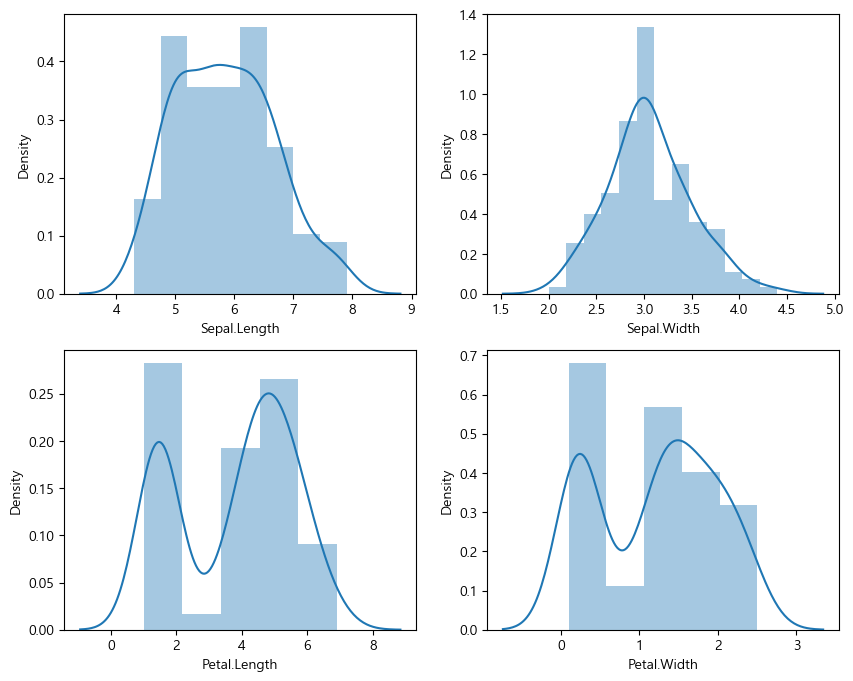

In [5]:
plt.figure(figsize=(10,8))
for i in list(range(0,4)):
    x = 221
    plt.subplot( 2, 2, 1+i )
    sb.distplot(df_iris.iloc[:, i])

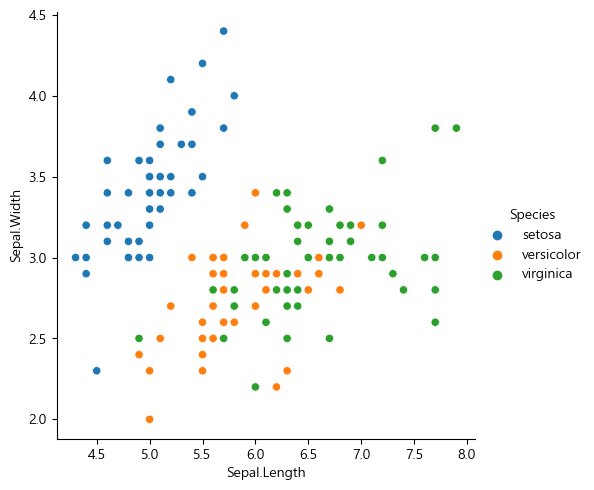

In [6]:
sb.relplot( x = df_iris['Sepal.Length'], y = df_iris['Sepal.Width'],
            hue = df_iris['Species'],
            kind="scatter")

# 주성분 분석 전 Scaling

In [7]:
x = df_iris.iloc[:, 0:4]
y = df_iris.iloc[:, 4]

## Standard Scaled

In [8]:
df_scaled = StandardScaler().fit_transform( df_iris.iloc[:, 0:4] )

for i in list(range(0,4)):
    df_iris.iloc[:, i] = df_scaled[:, i]
    
df_iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,-0.900681,1.019004,-1.340227,-1.315444,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,setosa
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,virginica
146,0.553333,-1.282963,0.705921,0.922303,virginica
147,0.795669,-0.131979,0.819596,1.053935,virginica
148,0.432165,0.788808,0.933271,1.448832,virginica


## Scaling 후의 데이터 분포 확인

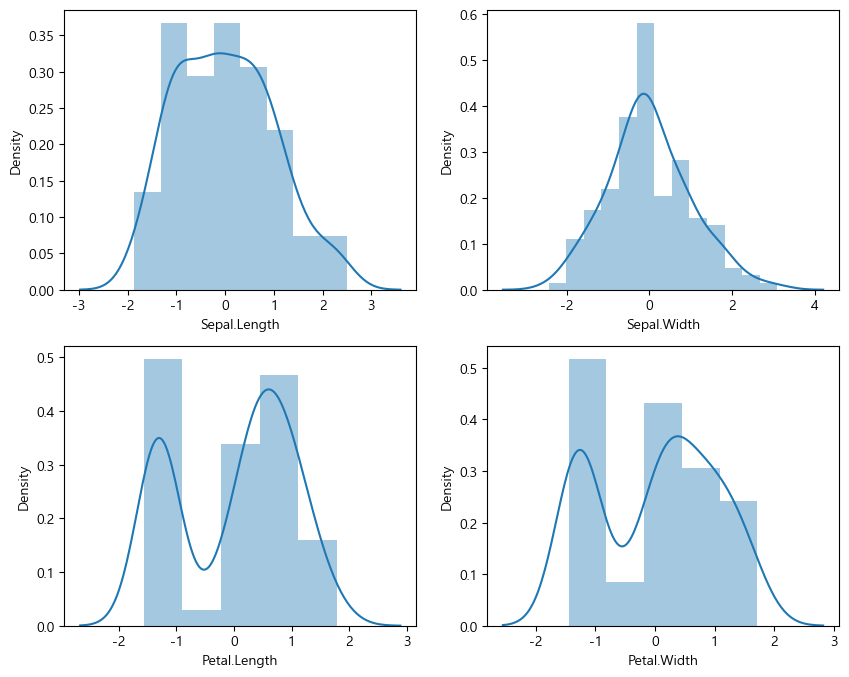

In [9]:
plt.figure(figsize=(10,8))
for i in list(range(0,4)):
    x = 221
    plt.subplot( 2, 2, 1+i )
    sb.distplot(df_iris.iloc[:, i])

# 주성분 분석 - sklearn 사용

- `sklearn.decomposition`  
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition

- `sklearn.decomposition.PCA( n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None )`  
  - Attributes : `.components_`, `.explained_variance_`, `.explained_variance_ratio_`, `.singular_values_`, `.mean_`, `.n_components_`, `.n_features_`, `.n_samples_`, `.noise_variance_`

## 주성분 분석 모델 생성 및 적합

In [10]:
model_pca = PCA()

fit_model = model_pca.fit_transform( df_iris.iloc[:,0:4] )

In [11]:
df_pca = pd.DataFrame( data = fit_model,
                       columns = ['PC1', 'PC2', 'PC3', 'PC4'])

df_pca['Target'] = df_iris['Species']
df_pca

,PC1,PC2,PC3,PC4,Target
0,-2.264703,0.480027,-0.127706,-0.024168,setosa
1,-2.080961,-0.674134,-0.234609,-0.103007,setosa
2,-2.364229,-0.341908,0.044201,-0.028377,setosa
3,-2.299384,-0.597395,0.091290,0.065956,setosa
4,-2.389842,0.646835,0.015738,0.035923,setosa
...,...,...,...,...,...
145,1.870503,0.386966,0.256274,-0.389257,virginica
146,1.564580,-0.896687,-0.026371,-0.220192,virginica
147,1.521170,0.269069,0.180178,-0.119171,virginica
148,1.372788,1.011254,0.933395,-0.026129,virginica


## 결과 분석

### 요인의 중요도 (Importance of Components)

In [12]:
# 주성분 각각의 설명력
model_pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [13]:
# 주성분 각각의 설명력 비율
model_pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

### 주성분의 적재량(Loadings)

In [14]:
# feature 공간의 주성분 축
model_pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

### Scree plot

PC 1 의 설명력 비율 : 0.7296
PC 2 의 설명력 비율 : 0.2285
PC 3 의 설명력 비율 : 0.0367
PC 4 의 설명력 비율 : 0.0052



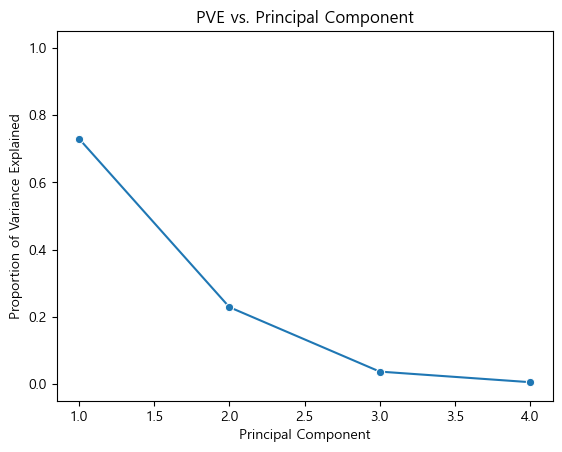

In [15]:
# Plotting the variances for each PC

PC_number = range(1, model_pca.n_components_+1)

for i in PC_number:
    print( 'PC', i, '의 설명력 비율 :', model_pca.explained_variance_ratio_[i-1].round(4) )
print()

plot = sb.lineplot( x = PC_number,
                    y = model_pca.explained_variance_ratio_,
                    marker="o")

plot.set( title = "PVE vs. Principal Component",
         xlabel = "Principal Component",
         ylabel = "Proportion of Variance Explained",
         ylim = (-0.05, 1.05) )

plt.show()

PC 1 의 설명력 비율 : 0.7296
PC 2 의 설명력 비율 : 0.2285
PC 3 의 설명력 비율 : 0.0367
PC 4 의 설명력 비율 : 0.0052



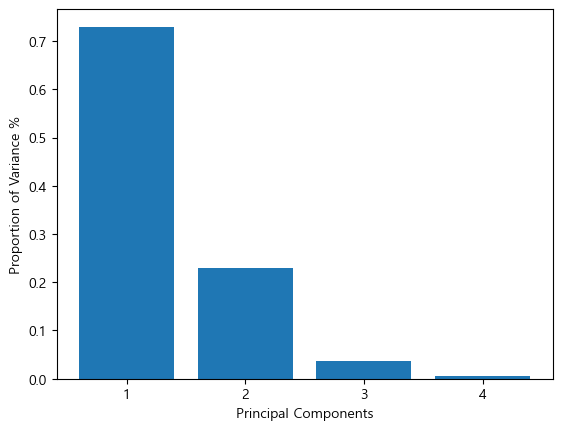

In [16]:
# Plotting the variances for each PC

PC_number = range(1, model_pca.n_components_+1)

for i in PC_number:
    print( 'PC', i, '의 설명력 비율 :', model_pca.explained_variance_ratio_[i-1].round(4) )

print()
plt.bar(PC_number, model_pca.explained_variance_ratio_)

plt.xlabel('Principal Components')
plt.ylabel('Proportion of Variance %')
plt.xticks(PC_number)
plt.show()

### Biplot

In [17]:
# 시각화 수행 시 Label Encoding 된 target 이 필요
encoder = LabelEncoder()
y = encoder.fit_transform( df_iris['Species'] )

# Biplot 시각화 함수 생성
def myplot( score, coeff, labels=None ):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'r', alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

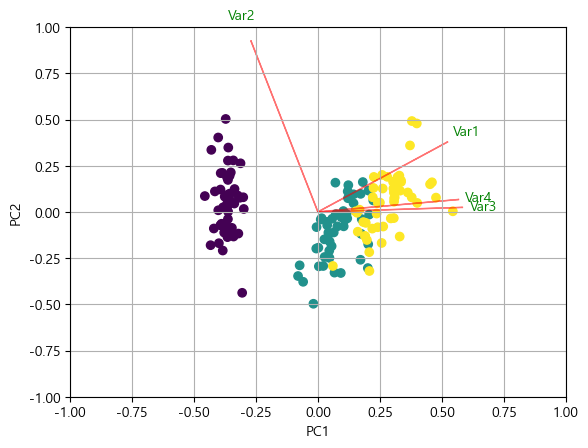

In [18]:
#Call the function. Use only the 2 PCs.
myplot( fit_model[:,0:2],
        np.transpose( model_pca.components_[0:2, :] ) )

plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

plt.show()